# startup
The task is to develop a machine learning model that can predict the success rate of startups based on various attributes and features. Startup success rate prediction involves analyzing factors such as funding, team composition, industry, market trends, and other relevant variables to estimate the likelihood of a startup's success. The goal is to create a model that can accurately predict the success or failure of startups, assisting entrepreneurs, investors, and stakeholders in making informed decisions.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('sd.CSV')

In [3]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [5]:
#we have found missing values since we will be using ffill for such 


In [6]:
print(df['age_first_milestone_year'])

0      4.6685
1      7.0055
2      1.4575
3      6.0027
4      0.0384
        ...  
918    0.5808
919    6.0027
920    9.0055
921    0.7589
922    4.0027
Name: age_first_milestone_year, Length: 923, dtype: float64


In [7]:

df['closed_at'] = df['closed_at'].fillna(method='ffill')


In [8]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                     4
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [9]:
df['age_first_milestone_year'].interpolate(inplace=True)

In [10]:
df['age_last_milestone_year'].interpolate(inplace=True)

In [11]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                     4
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [12]:
df1=df.drop('Unnamed: 6',axis=1)

In [13]:
df1.isnull().sum()

Unnamed: 0                  0
state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
labels                      0
founded_at                  0
closed_at                   4
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                1
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvi

In [14]:
df1.drop('state_code.1',axis=1)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,CoTweet,1,1/1/2009,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Reef Point Systems,0,1/1/1998,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,Paracor Medical,0,1/1/1999,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,Causata,1,1/1/2009,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

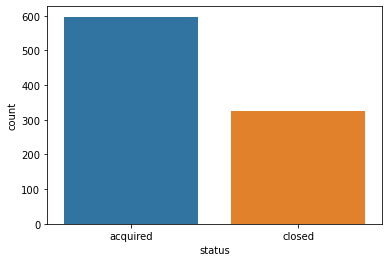

In [15]:
sns.countplot(df1['status'])

In [16]:
 df1['status'].value_counts()

acquired    597
closed      326
Name: status, dtype: int64

In [17]:
df2 = pd.get_dummies(df['status'], prefix='status')

# Concatenate the one-hot encoded columns with the original DataFrame
df3 = pd.concat([df1, df2], axis=1)

# Drop the original 'status' column
df3.drop('status', axis=1, inplace=True)


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   name                      923 non-null    object 
 8   labels                    923 non-null    int64  
 9   founded_at                923 non-null    object 
 10  closed_at                 919 non-null    object 
 11  first_funding_at          923 non-null    object 
 12  last_funding_at           923 non-null    object 
 13  age_first_funding_year    923 non-null    float64
 14  age_last_f

In [19]:
df4=df3.select_dtypes(include=['int64','float','uint8'])

In [20]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   labels                    923 non-null    int64  
 4   age_first_funding_year    923 non-null    float64
 5   age_last_funding_year     923 non-null    float64
 6   age_first_milestone_year  923 non-null    float64
 7   age_last_milestone_year   923 non-null    float64
 8   relationships             923 non-null    int64  
 9   funding_rounds            923 non-null    int64  
 10  funding_total_usd         923 non-null    int64  
 11  milestones                923 non-null    int64  
 12  is_CA                     923 non-null    int64  
 13  is_NY                     923 non-null    int64  
 14  is_MA     

In [21]:
df4.columns


Index(['Unnamed: 0', 'latitude', 'longitude', 'labels',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status_acquired', 'status_closed'],
      dtype='object')

In [123]:
df5=df4.drop(['Unnamed: 0', 'latitude', 'longitude','age_first_funding_year', 'age_last_funding_year','has_roundA', 'has_roundB', 'has_roundC', 'has_roundD'],axis=1)

In [124]:
#imbalance removing


In [125]:
#spliting dataset into training set and testing set

In [126]:
X=df5.drop('status_acquired',axis=1)
y=df5['status_acquired']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [127]:
#feature scaling our data set as our data requires it for ml algorithms 

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [129]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)

In [130]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score



In [131]:
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred1=log.predict(X_test)

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
log.fit(X_train,y_train)
y_pred1=log.predict(X_test)

In [133]:
accuracy_score(y_test,y_pred1)

1.0

In [134]:
precision_score(y_test,y_pred1)

1.0

In [135]:
recall_score(y_test,y_pred1)

1.0

In [136]:
f1_score(y_test,y_pred1)

1.0

In [137]:
from sklearn import svm

In [138]:
svm=svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [139]:
y_pred2=svm.predict(X_test)
accuracy_score(y_test,y_pred2)

1.0

In [140]:
precision_score(y_test,y_pred2)

1.0

In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)

In [142]:
accuracy_score(y_test,y_pred3)

0.9623430962343096

In [143]:
precision_score(y_test,y_pred3)

0.9552238805970149

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
dt = DecisionTreeClassifier()

In [146]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [147]:
y_pred4=dt.predict(X_test)

In [148]:
accuracy_score(y_test,y_pred4)

1.0

In [149]:
precision_score(y_test,y_pred4)

1.0

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred5=rf.predict(X_test)

In [151]:
accuracy_score(y_test,y_pred5)

1.0

In [152]:
precision_score(y_test,y_pred5)

1.0

In [153]:
# gradient boosting

In [154]:
from sklearn.ensemble import GradientBoostingClassifier

In [155]:
gbc=GradientBoostingClassifier()

In [156]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [157]:
y_pred6=gbc.predict(X_test)

In [158]:
accuracy_score(y_test,y_pred6)

1.0

In [159]:
precision_score(y_test,y_pred6)

1.0

In [160]:
final_data=pd.DataFrame({'models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)]})

In [161]:
final_data

,models,ACC
0,LR,1.000000
1,SVC,1.000000
2,KNN,0.962343
3,DT,1.000000
4,RF,1.000000
5,GBC,1.000000


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='models', ylabel='ACC'>

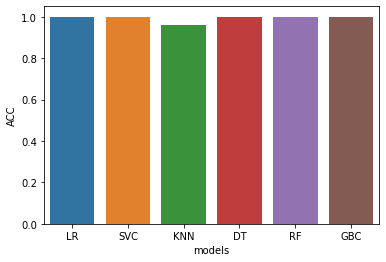

In [162]:
sns.barplot(final_data['models'],final_data['ACC'])

In [163]:
final_data=pd.DataFrame({'models':['LR','SVC','KNN','DT','RF','GBC'],'pre':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred2),precision_score(y_test,y_pred3),precision_score(y_test,y_pred4),precision_score(y_test,y_pred5),precision_score(y_test,y_pred6)]})

In [164]:
final_data

,models,pre
0,LR,1.000000
1,SVC,1.000000
2,KNN,0.955224
3,DT,1.000000
4,RF,1.000000
5,GBC,1.000000


In [165]:
X_res=sc.fit_transform(X_res)

In [166]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [167]:
import joblib

In [168]:
joblib.dump(rf,'startup_success_model')

['startup_success_model']

In [169]:
model = joblib.load('startup_success_model')

In [170]:
df4.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'labels',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status_acquired', 'status_closed'],
      dtype='object')

In [171]:
import tkinter as tk
from tkinter import ttk

rf = RandomForestClassifier()
rf.fit(X_res,y_res)





# GUI application
def predict():
    input_data = [float(entry.get()) if entry.get().strip() else 0.0 for entry in entry_widgets]
    prediction = rf.predict([input_data])

    # Map the numerical prediction result to labels
    prediction_label = "Acquired" if prediction[0] == 1 else "Closed"
    result_label.config(text=f"Predicted Status: {prediction_label}")

root = tk.Tk()
root.title("Random Forest Classifier GUI")

frame = ttk.Frame(root)
frame.pack(padx=20, pady=20)

entry_widgets = []

features = list(df4.columns)  # Use the column names from your dataset

columns = 3
for idx, feature in enumerate(features):
    row = idx // columns
    col = idx % columns

    label = ttk.Label(frame, text=feature)
    label.grid(row=row, column=col * 2, sticky='w', padx=5, pady=5)

    entry = ttk.Entry(frame)
    entry.grid(row=row, column=col * 2 + 1, padx=5, pady=5)

    entry_widgets.append(entry)

predict_button = ttk.Button(root, text="Predict", command=predict)
predict_button.pack(pady=10)

result_label = ttk.Label(root, text="")
result_label.pack()

root.mainloop()

